In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Read dataset to a dataframe
df = pd.read_csv('final_fullset_cleared.csv')

df

,year,city,season,area(hec),production(MT),tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,2009,Kurunegala,1,491.00,1695,31.426257,21.556983,27.377654,35.978212,21.556983,29.975978,22.402235,75.672737,20.652514,169.201117,1009.093296,45.236872,11.863128
1,2009,Kurunegala,2,384.00,3648,30.735119,21.498810,27.035714,35.520833,21.498810,29.496429,23.038690,79.574762,19.487500,187.786905,1009.424405,57.911310,12.922024
2,2010,Kurunegala,1,504.00,1715,32.743094,21.376796,27.580110,37.991160,21.376796,30.455249,22.895580,77.036298,20.113260,164.210497,1009.548619,50.776796,13.509392
3,2010,Kurunegala,2,414.00,3929,30.269022,21.120109,26.505435,34.859783,21.120109,28.627717,22.838587,80.983152,19.066304,202.689674,1008.176087,67.685870,13.566304
4,2011,Kurunegala,1,496.00,1587,31.633523,21.084659,27.017045,36.293750,21.084659,29.450568,22.651136,78.151420,20.335795,165.268750,1008.642045,60.318750,13.209659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,Nuwaraeliya,1,59.00,1262,19.002312,13.518497,15.824855,19.028902,13.518497,15.869942,13.206936,85.348092,11.668786,233.346821,1010.005780,65.633526,17.602312
116,2017,Nuwaraeliya,1,27.61,394,20.706897,12.003448,15.935632,20.785632,12.000000,15.989655,11.847126,79.532701,9.758621,191.841379,1010.048851,55.951724,16.705747
117,2017,Nuwaraeliya,2,31.00,451,19.253333,13.970000,16.192778,19.252778,13.970000,16.232778,14.115556,88.057167,10.872222,232.321111,1009.157222,75.410556,16.677778
118,2018,Nuwaraeliya,1,9.00,235,20.076437,12.905747,16.143103,20.089080,12.905747,16.186207,13.051149,83.634310,12.139655,177.602874,1009.322414,61.379310,18.171264


In [14]:
label_encoder = LabelEncoder()

def label_encoder_converter(df_in):
    
    df['city'] = label_encoder.fit_transform(df['city'])


label_encoder_converter(df)

In [15]:
df= df.drop(['year'], axis=1)

In [16]:
df

,city,season,area(hec),production(MT),tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility
0,3,1,491.00,1695,31.426257,21.556983,27.377654,35.978212,21.556983,29.975978,22.402235,75.672737,20.652514,169.201117,1009.093296,45.236872,11.863128
1,3,2,384.00,3648,30.735119,21.498810,27.035714,35.520833,21.498810,29.496429,23.038690,79.574762,19.487500,187.786905,1009.424405,57.911310,12.922024
2,3,1,504.00,1715,32.743094,21.376796,27.580110,37.991160,21.376796,30.455249,22.895580,77.036298,20.113260,164.210497,1009.548619,50.776796,13.509392
3,3,2,414.00,3929,30.269022,21.120109,26.505435,34.859783,21.120109,28.627717,22.838587,80.983152,19.066304,202.689674,1008.176087,67.685870,13.566304
4,3,1,496.00,1587,31.633523,21.084659,27.017045,36.293750,21.084659,29.450568,22.651136,78.151420,20.335795,165.268750,1008.642045,60.318750,13.209659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5,1,59.00,1262,19.002312,13.518497,15.824855,19.028902,13.518497,15.869942,13.206936,85.348092,11.668786,233.346821,1010.005780,65.633526,17.602312
116,5,1,27.61,394,20.706897,12.003448,15.935632,20.785632,12.000000,15.989655,11.847126,79.532701,9.758621,191.841379,1010.048851,55.951724,16.705747
117,5,2,31.00,451,19.253333,13.970000,16.192778,19.252778,13.970000,16.232778,14.115556,88.057167,10.872222,232.321111,1009.157222,75.410556,16.677778
118,5,1,9.00,235,20.076437,12.905747,16.143103,20.089080,12.905747,16.186207,13.051149,83.634310,12.139655,177.602874,1009.322414,61.379310,18.171264


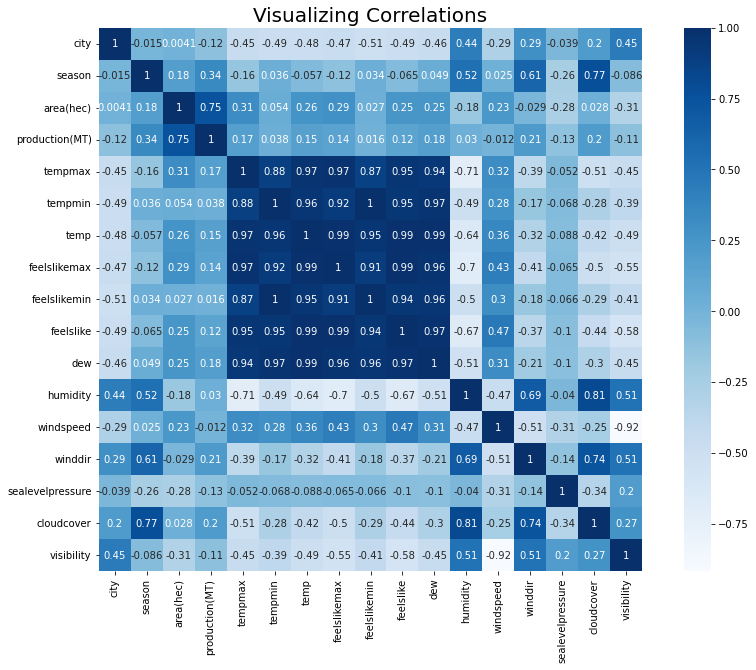

In [17]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

In [18]:
list(df)

['city',
 'season',
 'area(hec)',
 'production(MT)',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'windspeed',
 'winddir',
 'sealevelpressure',
 'cloudcover',
 'visibility']

In [19]:
X = df[['city','season', 'area(hec)','tempmax','tempmin','temp','feelslikemax','feelslikemin','feelslike','dew','humidity','windspeed','winddir','sealevelpressure','cloudcover','visibility']].values

#X = df.iloc[:, 1:].values

Y = df['production(MT)'].values

In [20]:
X

array([[3.00000000e+00, 1.00000000e+00, 4.91000000e+02, ...,
        1.00909330e+03, 4.52368715e+01, 1.18631285e+01],
       [3.00000000e+00, 2.00000000e+00, 3.84000000e+02, ...,
        1.00942440e+03, 5.79113095e+01, 1.29220238e+01],
       [3.00000000e+00, 1.00000000e+00, 5.04000000e+02, ...,
        1.00954862e+03, 5.07767956e+01, 1.35093923e+01],
       ...,
       [5.00000000e+00, 2.00000000e+00, 3.10000000e+01, ...,
        1.00915722e+03, 7.54105556e+01, 1.66777778e+01],
       [5.00000000e+00, 1.00000000e+00, 9.00000000e+00, ...,
        1.00932241e+03, 6.13793103e+01, 1.81712644e+01],
       [5.00000000e+00, 2.00000000e+00, 2.00000000e+01, ...,
        1.00994528e+03, 7.31830189e+01, 1.79817610e+01]])

In [21]:
Y

array([1695, 3648, 1715, 3929, 1587, 3762, 1344, 2584, 1179, 3762,  966,
       3857, 1077, 1433, 2831, 3123, 2718, 1919,  966, 2141,  423,  442,
        465,  350,  482,  284,  459,  360,  482,  266,  462,  266,  337,
       3011,   66,  575,   89,  126,  360,  129, 1351, 2177, 1363, 2557,
       1550, 2608, 1539, 2451, 1616, 2336,   76,  792, 1171, 1957,  906,
       2031, 1067, 2300, 1616, 2704, 1498, 2949, 1662, 3078, 1410, 2880,
       1291, 2188, 1421, 2229, 1626, 2584, 1510, 2660, 1361, 2536,  939,
       1747, 1715, 3102,  825, 1254,  708, 1089,  412,  864,  634,  929,
        614,  911,  430,  746,  437,  813,  295,  596,  264,  446,  472,
        640,  200,  486,  221,  474,   99,  344,   99,  344,  224,  648,
        235,  659, 1496, 2268,  786, 1262,  394,  451,  235,  344],
      dtype=int64)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [24]:
Acc_regr = regr.score(X_test, y_test)

print("Accuracy:", Acc_regr * 100, "%")

Accuracy: 36.04432338228766 %
